## Easy Detecto Mobilenet Training
Credit to: https://www.analyticsvidhya.com/blog/2021/06/simplest-way-to-do-object-detection-on-custom-datasets/

Detecto is a library written by Facebook that helps make training and loading data easier.

In theory, we can use Detecto to hand-off data to PyTorch's training, but for now, it is best to use Detecto's in-built wrapper for MobileNetV3.

In [1]:
import os
import torch
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:

custom_transforms = transforms.Compose([
transforms.ToPILImage(),
    transforms.ToTensor(),
utils.normalize_transform(),
])

In [3]:
# cwd = '/mnt/c/Users/aricv/Downloads/FRC ball detection.v17i.voc'
# cwd = '/mnt/c/Users/aricv/Downloads/Coin Detection.v2i.voc'
cwd = '/mnt/c/Users/aricv/Downloads/FRC 2022 Balls.v2i.voc'
# https://universe.roboflow.com/shawn-smith-6276s/frc-2022-balls/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

In [4]:
Train_dataset=core.Dataset(cwd+'/train',transform=custom_transforms)
Test_dataset=core.Dataset(cwd+'/validtest',transform=custom_transforms)
print("Size of Training Set: " + str(len(Train_dataset)))
print("Size of Testing Set: " + str(len(Test_dataset)))

Train_dataset[0][0].size()

Size of Training Set: 45
Size of Testing Set: 19


torch.Size([3, 640, 640])

In [5]:
training_loader=core.DataLoader(Train_dataset, batch_size=1, shuffle=True)
validation_loader=core.DataLoader(Test_dataset, batch_size=1, shuffle=True)

In [6]:
from detecto.core import Model
# https://learnopencv.com/fcos-anchor-free-object-detection-explained/
# model_base = core.Model(classes=['quarter', 'penny', 'quarterrotation', 'pennyrotation'], model_name=Model.FCOS)
# model_base = core.Model(['orange', 'redball', 'blueball', 'ball'], model_name= "fasterrcnn_mobilenet_v3_large_320_fpn")
model_base = core.Model(['ball'], model_name= "fasterrcnn_mobilenet_v3_large_320_fpn")

/home/aric/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aric/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
# Low learning rate is needed, trained 10 epochs each while increasing learning_rate
losses = model_base.fit(training_loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.0001, verbose=True)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.88it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.31it/s]


Loss: 0.96343164381228
Epoch 2 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.29it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.03it/s]


Loss: 0.7816476476819891
Epoch 3 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:08<00:00,  5.37it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.95it/s]


Loss: 0.8721374351727335
Epoch 4 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.82it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.88it/s]


Loss: 0.7557036312002885
Epoch 5 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.56it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.70it/s]


Loss: 0.7884119137337333
Epoch 6 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.88it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.92it/s]


Loss: 0.660506032015148
Epoch 7 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.94it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.55it/s]


Loss: 0.6378930728686484
Epoch 8 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.85it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.60it/s]


Loss: 0.6104277364517513
Epoch 9 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.62it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.05it/s]


Loss: 0.6051490879372546
Epoch 10 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 45/45 [00:15<00:00,  2.90it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.25it/s]

Loss: 0.5960993076625624


In [23]:
model_base.save('model_ball_weights.pth')

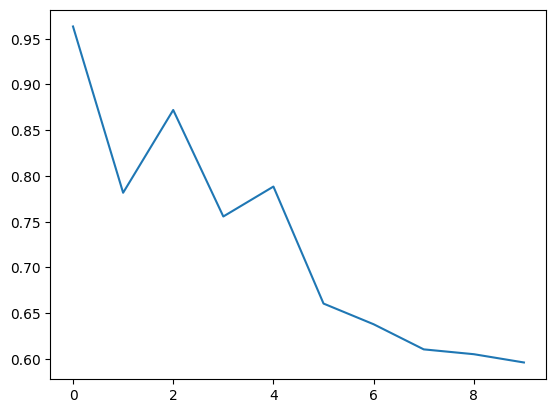

In [24]:
plt.plot(losses)
plt.show()

In [30]:
# image = utils.read_image(cwd+'/result/input.png') 
image = utils.read_image(cwd+'/result/download2.jpg') 

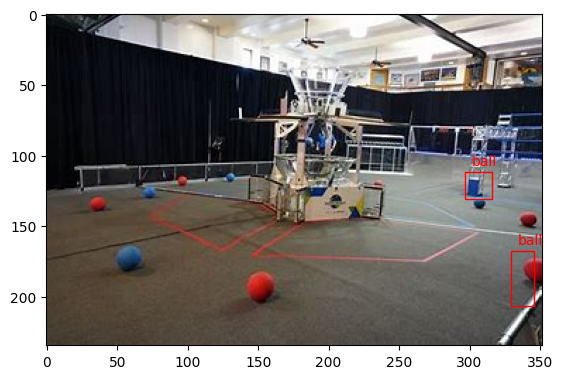

In [32]:
from detecto.core import Model
# model_base.get_internal_model().load_state_dict(torch.load('mb2-ssd-lite-mp-0_686.pth', map_location=model_base._device))

predictions = model_base.predict(image)
labels, boxes, scores = predictions
thresh=0.0
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)